# Librerías para graficar

In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Matplotlib

In [2]:
import pandas as pd
from datetime import datetime, timedelta

# Crear datos de ejemplo
fechas = [datetime(2025, 10, 1) + timedelta(days=x) for x in range(5)]
datos = {
    'Ventas': [100, 150, 200, 180, 220],
    'Gastos': [80, 90, 110, 100, 120],
    'Categoría': ['A', 'B', 'A', 'B', 'A']
}
df = pd.DataFrame(datos, index=pd.to_datetime(fechas))

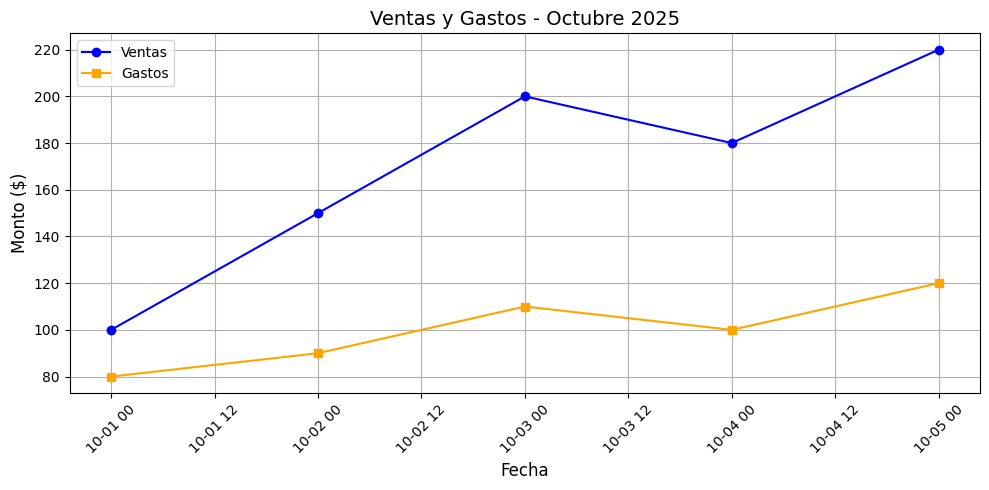

In [3]:
import matplotlib.pyplot as plt

# Crear figura y ejes
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Ventas'], label='Ventas', marker='o', color='blue')
plt.plot(df.index, df['Gastos'], label='Gastos', marker='s', color='orange')

# Personalizar el gráfico
plt.title('Ventas y Gastos - Octubre 2025', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Monto ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

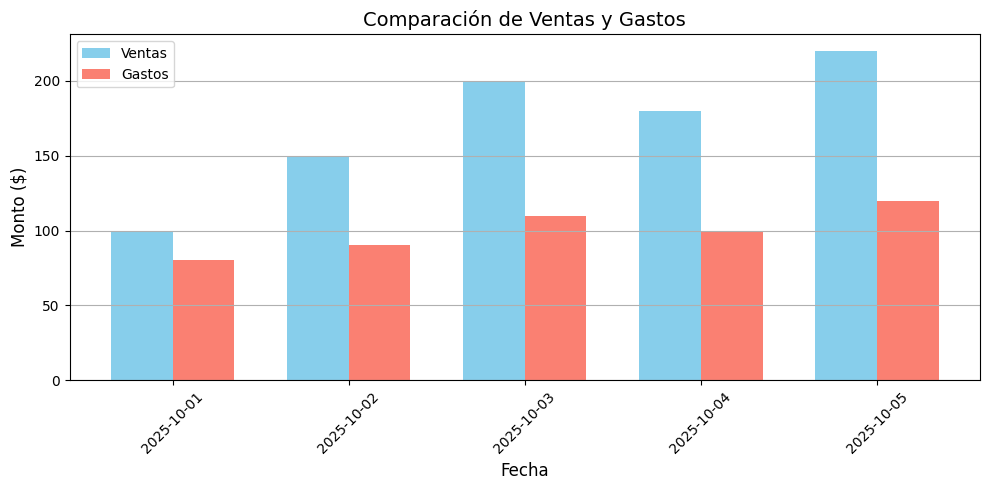

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar las posiciones de las barras
x = np.arange(len(df))
ancho = 0.35  # Ancho de las barras

# Crear figura y ejes
plt.figure(figsize=(10, 5))
plt.bar(x - ancho/2, df['Ventas'], ancho, label='Ventas', color='skyblue')
plt.bar(x + ancho/2, df['Gastos'], ancho, label='Gastos', color='salmon')

# Personalizar el gráfico
plt.title('Comparación de Ventas y Gastos', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Monto ($)', fontsize=12)
plt.xticks(x, df.index.strftime('%Y-%m-%d'), rotation=45)
plt.legend()
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

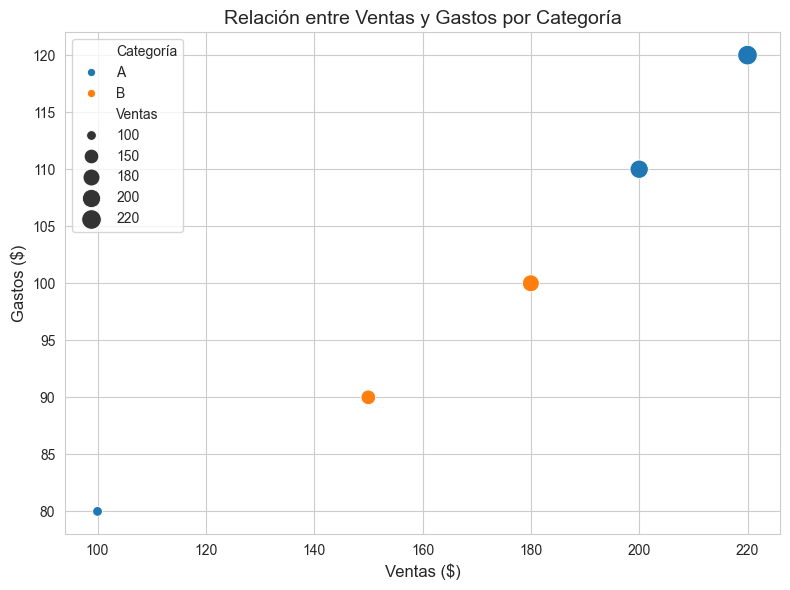

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de Seaborn
sns.set_style("whitegrid")

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Ventas', y='Gastos', hue='Categoría', size='Ventas', sizes=(50, 200))

# Personalizar el gráfico
plt.title('Relación entre Ventas y Gastos por Categoría', fontsize=14)
plt.xlabel('Ventas ($)', fontsize=12)
plt.ylabel('Gastos ($)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

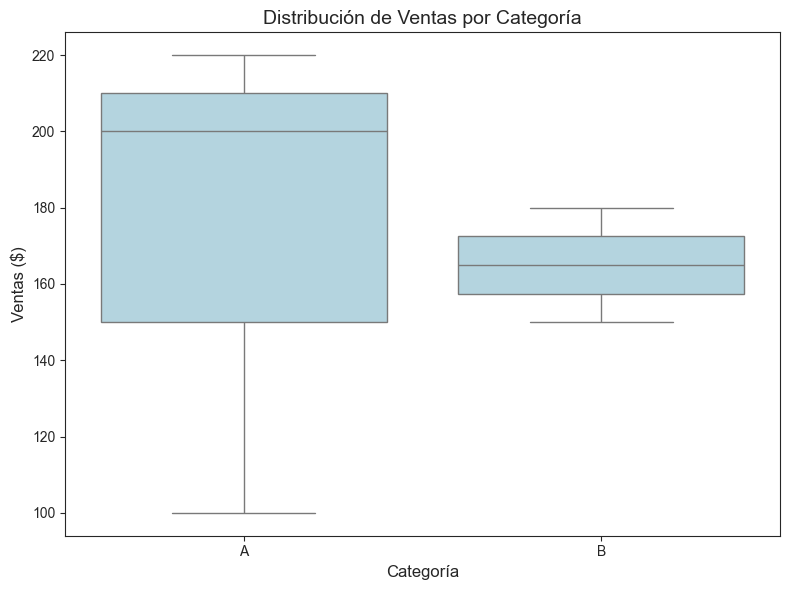

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo
sns.set_style("ticks")

# Crear gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Categoría', y='Ventas', color='lightblue')

# Personalizar el gráfico
plt.title('Distribución de Ventas por Categoría', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Ventas ($)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

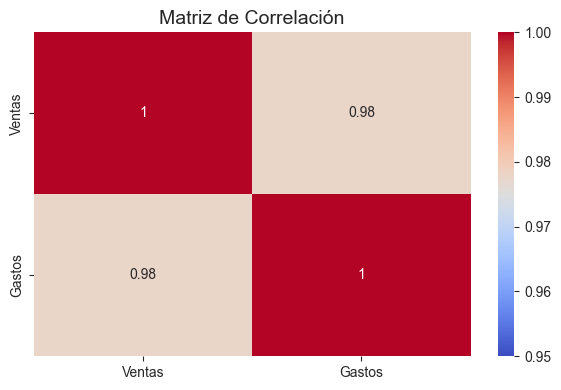

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlacion = df[['Ventas', 'Gastos']].corr()

# Crear heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=0.95, vmax=1)

# Personalizar el gráfico
plt.title('Matriz de Correlación', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Mapas

In [8]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


c:\Users\joako\OneDrive\1 - Posgrado\Workspace\00 - My Libraries\git_clones\ProgrammingWithAI\notebooks\figures.py:265: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.set_xticklabels(xlocs, fontsize=fs)
c:\Users\joako\OneDrive\1 - Posgrado\Workspace\00 - My Libraries\git_clones\ProgrammingWithAI\notebooks\figures.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.set_yticklabels(ylocs, fontsize=fs)


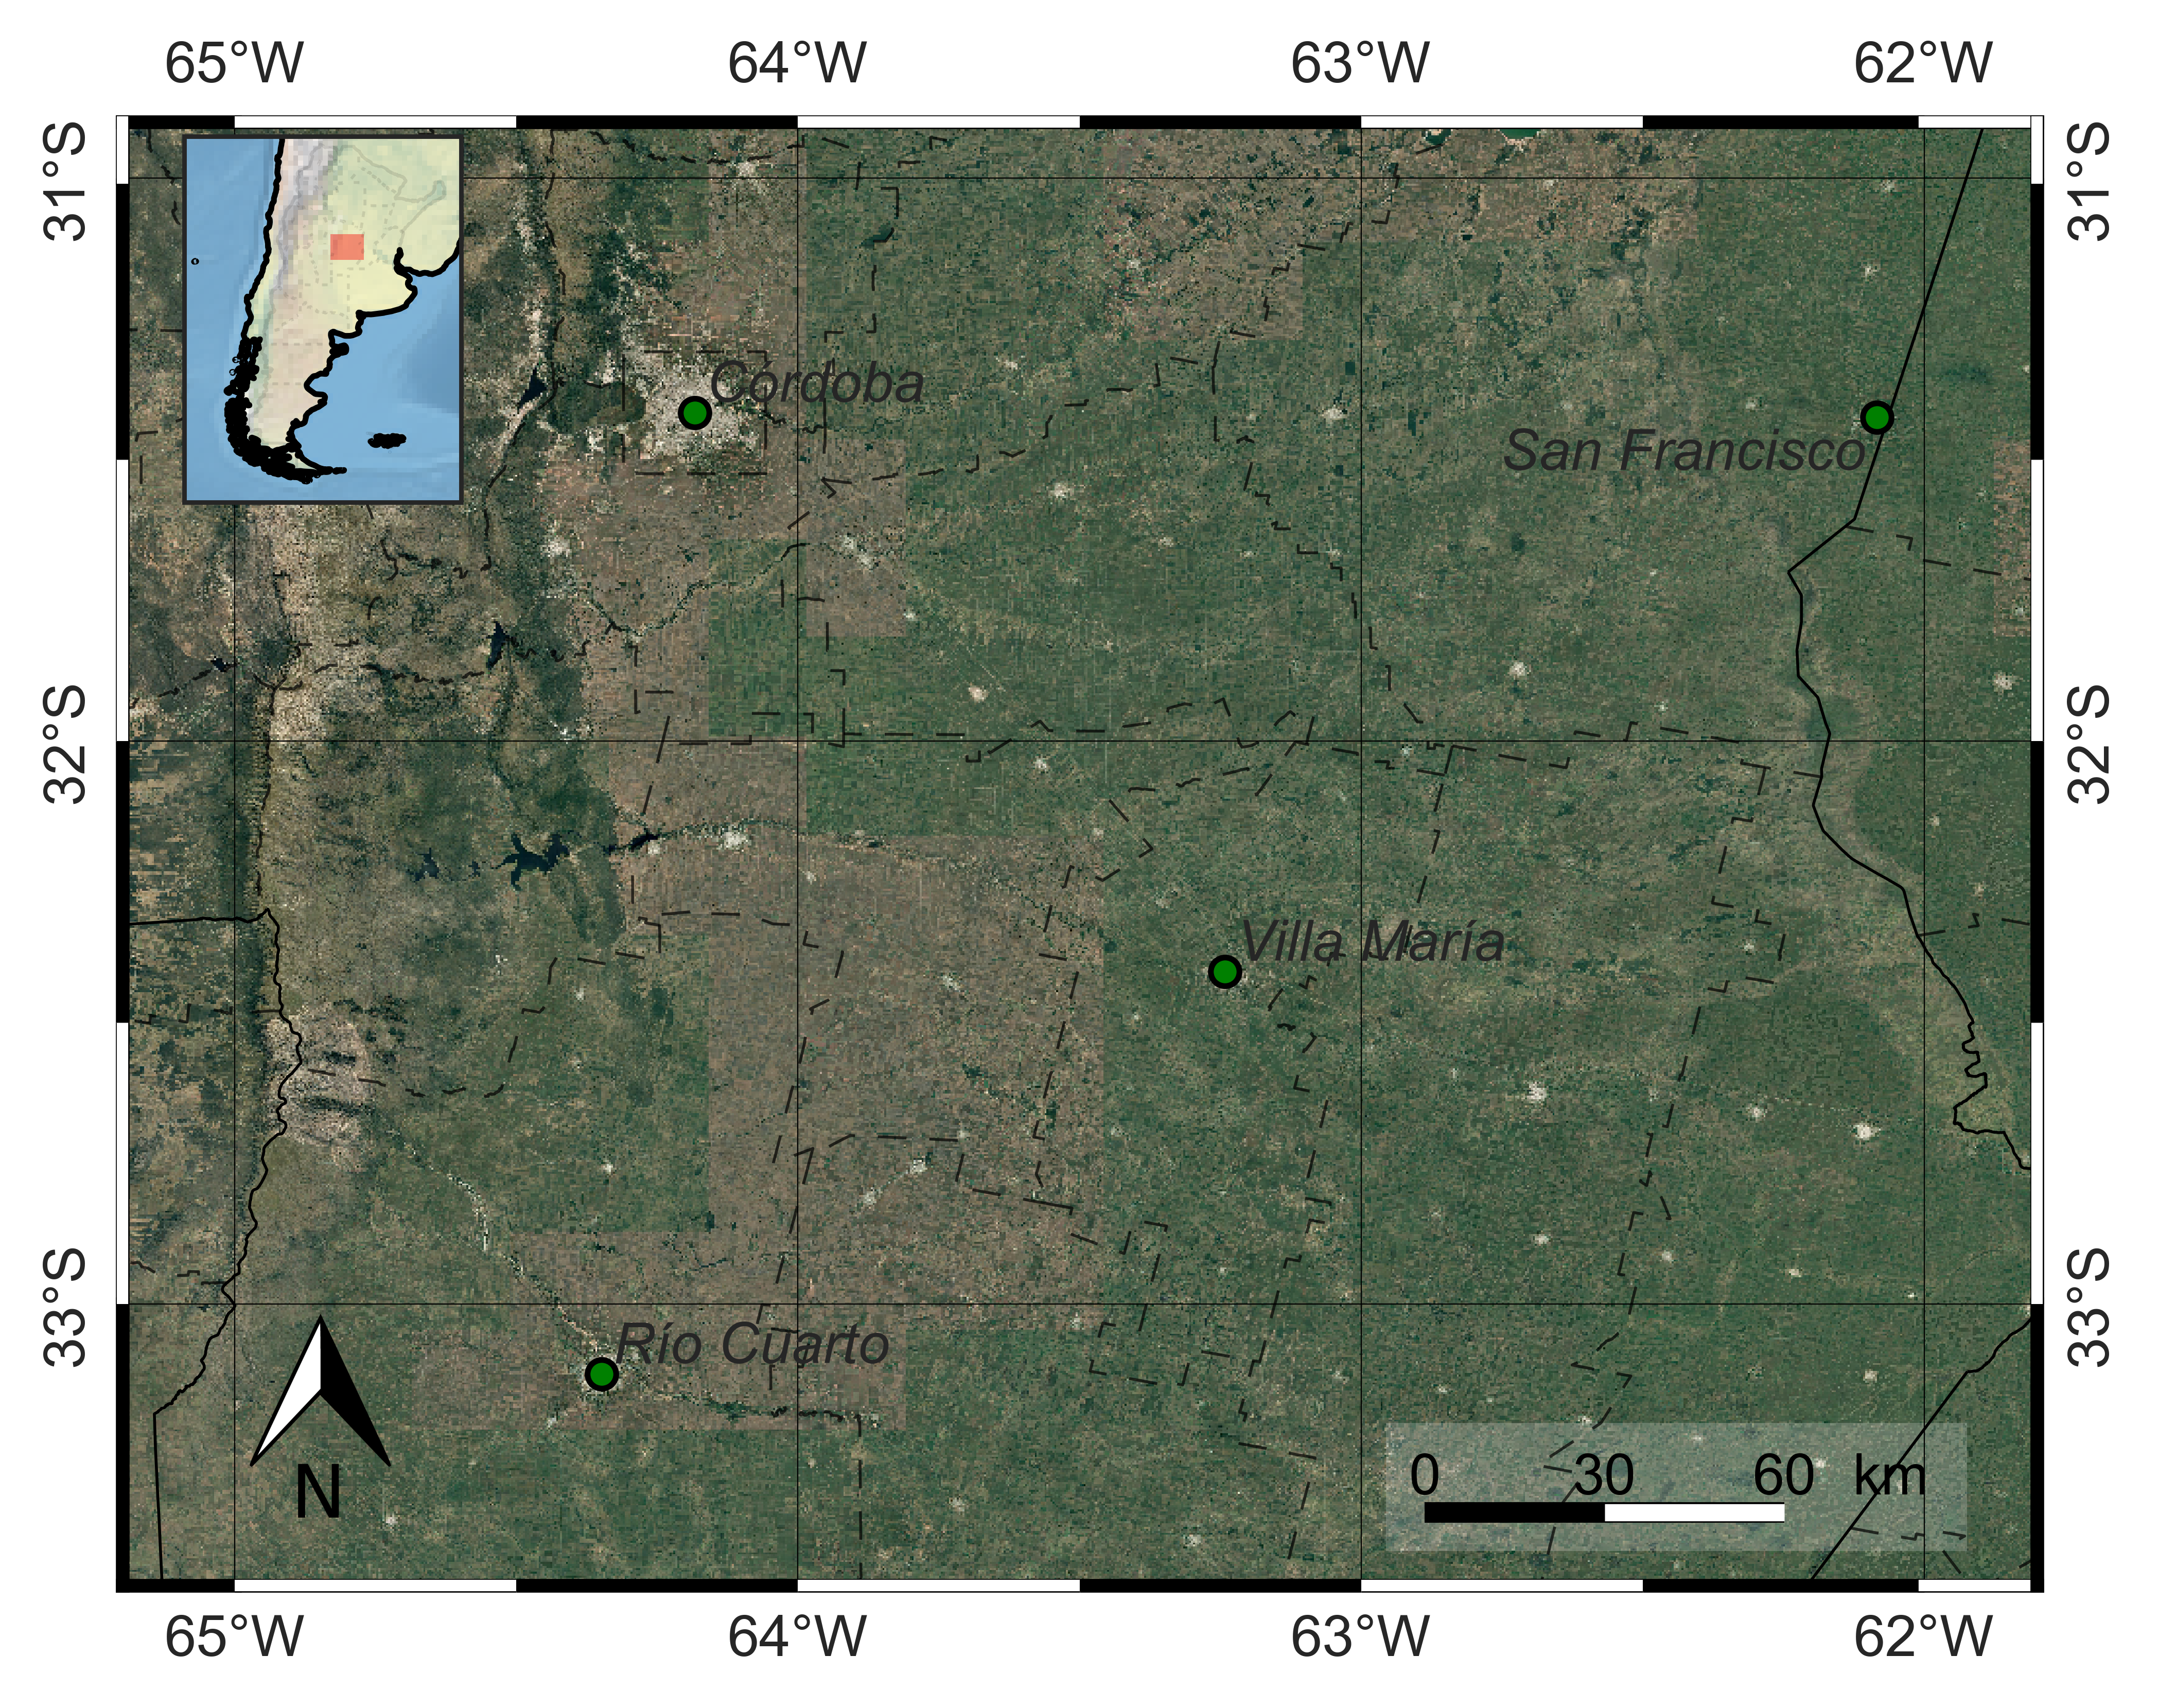

In [9]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

from pathlib import Path

from figures import (
    Map, DPI, COUNTIES_SHP_PATH, COUNTRIES_SHP_PATH,
    PROVINCES_SHP_PATH, scale_bar, zebra_frame, north_arrow,
)

text_df = 0.06
SMap = Map([-65.2, -61.8, -33.5, -30.9], crs1=ccrs.PlateCarree(), fs=10)
figsize = (6, 5.5)
zoom = 12
SMap.figure(figsize, DPI, zoom)
cities = [
    {'x': -64.183586, 'y': -31.416821, 's': 'Córdoba', 'ha': 'left', 'va': 'baseline'},
    {'x': -63.241463, 'y': -32.409001, 's': 'Villa María', 'ha': 'left', 'va': 'baseline'},
    {'x': -62.084000, 'y': -31.424936, 's': 'San Francisco', 'ha': 'right', 'va': 'top'},
    {'x': -64.349024, 'y': -33.123785, 's': 'Río Cuarto', 'ha': 'left', 'va': 'baseline'},
]
text_df = 0.02
for city in cities:
    SMap.ax.plot(
        city['x'], city['y'], transform=SMap.crs2, marker='.', mec='black',
        color='green', markersize=10, linestyle='',
    )
    if city['ha'] == 'right':
        city['x'], city['y'] = city['x'] - text_df, city['y'] - text_df
    else:
        city['x'], city['y'] = city['x'] + text_df, city['y'] + text_df
    SMap.ax.text(
        **city, transform=SMap.crs2, size=SMap.fs, style='italic',
    )
counties = list(
    shpreader.Reader(COUNTIES_SHP_PATH).geometries()
)
provinces = list(
    shpreader.Reader(PROVINCES_SHP_PATH).geometries()
)
countries = list(
    shpreader.Reader(COUNTRIES_SHP_PATH).geometries()
)
SMap.ax.add_geometries(
    counties, SMap.crs2, edgecolor='black', alpha=0.7,
    facecolor='none', linewidth=0.5, linestyle=(0, (10, 8)),
)
SMap.ax.add_geometries(
    provinces, SMap.crs2, edgecolor='black',
    facecolor='none', linewidth=0.5, linestyle='solid',
)
scale_bar(
    SMap.ax, n=2, fraction=0.2, labelsize=SMap.fs, lw=3,
    hpad=0.08, vpad=0.05, bpad=0.02,
)
zebra_frame(SMap.ax, SMap.bbox, 2, 2, fs=SMap.fs, crs=SMap.crs2)
bbox = SMap.ax.get_position()
width = 0.09
north_arrow(
    SMap.fig, Path('north.png'),
    [bbox.x0 + width - 0.055, bbox.y0 + 0.03, width, width],
)
SMap.inset([-80, -52, -58, -21], provinces, countries)
plt.show()